In [1]:
import os
import pandas as pd
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score

import matplotlib.pyplot as plt

In [2]:
def f1_score_by_batch_and_partition_size(batch_size, partition_size):
    files = [file for file in os.listdir('.') if file.endswith(f'.csv_predicted_with_batch_size_{batch_size}_partition_{partition_size}.csv') ]

    true = []
    pred = []

    for file in files:
        dataframe = pd.read_csv(file)
        true += dataframe['solution'].values.tolist()
        pred += dataframe['solution_predicted'].values.tolist()

    return f1_score(true, pred)

In [7]:
partition_sizes = [1000,2000,3000,4000,5000]
f1_scores = []

for partition_size in partition_sizes:
    f1_scores.append(f1_score_by_batch_and_partition_size(1, partition_size))

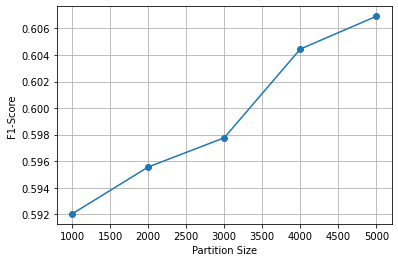

In [14]:
plt.xlabel("Partition Size")
plt.ylabel("F1-Score")
plt.grid()
plt.plot(partition_sizes, f1_scores, marker="o")